In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [32]:
def calculate_kernel_size(sigma):
    s = 2 * math.ceil(3 * sigma) + 1
    return s

In [58]:
def compute_kernel_values(kernel_size, sigma):
    mask = [[0 for x in range(kernel_size)] for y in range(kernel_size)]
    for i in range (0,kernel_size):
        for j in range (0,kernel_size):
            x = i - kernel_size//2
            y = j - kernel_size//2
            first_part = (-1/(math.pi*(sigma**4)))
            second_part = 1 - ((x**2 + y**2)//(2*(sigma**2)))
            third_part = (math.e**((-1*((x**2)+(y**2)))//(2*(sigma**2))))
            mask[i][j] = first_part*second_part*third_part

    
    #for i in range (0,kernel_size):
        #for j in range (0,kernel_size):
            #print(mask[i][j])
    
    return mask

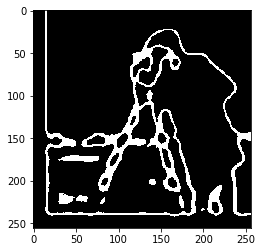

In [72]:
sigma = 5
kernel_size = calculate_kernel_size(sigma)

mask = compute_kernel_values(kernel_size, sigma)

for i in range (0,kernel_size):
    for j in range (0,kernel_size):
        mask[i][j] = mask[i][j] * (-1)

img = Image.open("cameraman.tif").convert("L")
convolved_img = [[0 for x in range(img.size[0])] for y in range(img.size[1])]
convolved_value = 0

for i in range (0,img.size[0]):
    for j in range (0,img.size[1]):
        convolved_value = 0
        for k in range (0,kernel_size):
            for l in range (0,kernel_size):
                try:
                    convolved_value = convolved_value + (img.getpixel((i+k,j+l)) * mask[k][l])
                except:
                    convolved_value = convolved_value + 0

        convolved_img[i][j] = convolved_value

convolve_min = convolved_img[0][0]
convolve_max = convolved_img[0][0]
        
for i in range (0,img.size[0]):
    for j in range (0,img.size[1]):
        if(convolved_img[i][j]<convolve_min):
            convolve_min = convolved_img[i][j]
        if(convolved_img[i][j]>convolve_max):
            convolve_max = convolved_img[i][j]

median_value = (convolve_max + convolve_min) // 2

for i in range (0,img.size[0]):
    for j in range (0,img.size[1]):
        if(convolved_img[i][j]>median_value):
            convolved_img[i][j] = 0
        
        
#for i in range (0,img.size[0]):
    #for j in range (0,img.size[1]):
        #print(convolved_img.getpixel((i,j)))

array = np.array(convolved_img, dtype=np.uint8)
array = np.rot90(array, 3)
new_im = Image.fromarray(array)
        
plt.imshow(new_im, cmap='gray')
new_im.save('LoG_2.jpg')